# Средњошколци у Републици Србији

У овом темату позабавићемо се подацима о средњошколском образовању у Републици Србији који су нам доступни кроз отворене податке Министарства за просвету, науку и технолошки развој: http://opendata.mpn.gov.rs/index.php?ucenici_studenti=srednje. Прерађени фајлови у .csv формату налази се у фолдеру *data* (као и радна свеска коришћена за његову припрему), а у редовима који следе, бавићемо се експлоративном обрадом ових података са следећим циљевима: 
- да истражимо врсте средњошколских образовних профила и њихову географску заступљеност
- који образовни профили су попупларни међу средњошколцима у Србији и да ли постоји разлика међу половима
- да визуелизујемо податаке различитим типовима стубичастих дијаграма

Кренућемо са учитавањем неопходних библиотека за обраду ових података - иако се потребна библиотека може учитати наредним командама у било ком делу радне свеске, зарад прегледности се то обично ради на самом почетку, а у наставку ће бити наглашено када је која од библиотека први пут искоришћена.

In [1]:
import pandas as pd # библиотека функција за обраду табеларних података
import numpy as np # библиотека функција за баратање низовима и матрицама
import matplotlib.pyplot as plt # библиотека функција за визуелизацију податка

За учитавање и обраду података изузетно практична и најпопуларнија библиотека функција је [*pandas*](https://pandas.pydata.org/), њу ћемо одмах искористити због изузетне практичности учитавања табеларних података. Постоји пар верзија функција за учитавање фајлова, али у анализи табеларних података начешће користимо [**read_csv**](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) за читање .csv фајлова (односно фајлова у којима су зарезом раздвојене вредности).

In [2]:
srednjeskole = pd.read_csv('data/srednjoskolci data/MPNTRopendata_sskole_pripremljeni.csv') # подаци о средњим школама на територији Србије
srednjoskolci = pd.read_csv('data/srednjoskolci data/MPNTRopendata_ss_pripremljeni.csv') # подаци о образовним профилима и њиховој популарности за сваку средњу школу

Да бисмо осмотрили шта се налази у променљивој *srednjeskole* искористићемо опцију [**head(n)**](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html) којом излиставамо првих n редова учитаних података:

In [3]:
srednjeskole.head(2)

,ID ustanove,Okrug,Opština,Naziv ustanove,Broj odeljenja,Broj kombinovanih odeljenja,Broj specijalnih odeljenja,Broj učenika,Broj devojčica,Broj nastavnika - bez zamena,Ukupna norma nastavnikaa - bez zamena,Broj zaposlenih - bez zamena,Ukupna norma zaposlenih- bez zamena
0,1322,Severnobački upravni okrug,Bačka Topola,Poljoprivredna škola,26,5,0,524,222,74,65.9749,109,103.4649
1,1323,Severnobački upravni okrug,Bačka Topola,Srednja tehnička škola Šinković Jožef,15,3,0,318,61,46,32.8130,60,46.0330


Слично ћемо погледати прва 2 реда у табели *srednjoskolci*:

In [4]:
srednjoskolci.head(2)

,ID ustanove,Okrug,Opština,Naziv ustanove,Područje rada,Obrazovni profil,Trajanje obrazovanja,Jezik nastave,Ukupno odeljenja,Ukupno učenika,Prosečan broj učenika u odeljenju,Ukupno devojcica,Ukupno decaka,Procenat devojcica,Procenat decaka
0,1322,Severnobački upravni okrug,Bačka Topola,Poljoprivredna škola,"Poljoprivreda, proizvodnja i prerada hrane",Poljoprivredni tehničar,4,Mađarski jezik,4,74,18.50,25,49,33.78,66.22
1,1322,Severnobački upravni okrug,Bačka Topola,Poljoprivredna škola,"Poljoprivreda, proizvodnja i prerada hrane",Veterinarski tehničar,4,Mađarski jezik,4,83,20.75,43,40,51.81,48.19


Видимо да оба сета података имају колоне "ID ustanove", "Okrug", "Opština", "Naziv ustanove" који ће нам бити на располагању за укрштање информација (довољана нам је и једна колона, нпр. јединствена бројчана колона "ID ustanove" али за читљивост и означавање визуализација у наставку сачуваћемо и имена школа и њихове локације по окрузима и општинама). Подаци о средњошколцима су детаљнији зато што за сваку школу имамо одвојене информације о свим образовним профилима у оквиру школе, за које имамо податке о броју ученика по разредима. Како у том сету имамо више од 30 колона, опцијом head их нисмо све осмотрили. Други начин да видимо шта све имамо на располагању је [**info**](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.info.html) којим излиставамо све колоне и сазнајемо који тип података је пајтон препознао при учитавању.

In [5]:
srednjoskolci.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3177 entries, 0 to 3176
Data columns (total 15 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   ID ustanove                        3177 non-null   int64  
 1   Okrug                              3177 non-null   object 
 2   Opština                            3177 non-null   object 
 3   Naziv ustanove                     3177 non-null   object 
 4   Područje rada                      3177 non-null   object 
 5   Obrazovni profil                   3177 non-null   object 
 6   Trajanje obrazovanja               3177 non-null   int64  
 7   Jezik nastave                      3177 non-null   object 
 8   Ukupno odeljenja                   3177 non-null   int64  
 9   Ukupno učenika                     3177 non-null   int64  
 10  Prosečan broj učenika u odeljenju  3177 non-null   float64
 11  Ukupno devojcica                   3177 non-null   int64

In [6]:
srednjeskole.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 446 entries, 0 to 445
Data columns (total 13 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   ID ustanove                            446 non-null    int64  
 1   Okrug                                  446 non-null    object 
 2   Opština                                446 non-null    object 
 3   Naziv ustanove                         446 non-null    object 
 4   Broj odeljenja                         446 non-null    int64  
 5   Broj kombinovanih odeljenja            446 non-null    int64  
 6   Broj specijalnih odeljenja             446 non-null    int64  
 7   Broj učenika                           446 non-null    int64  
 8   Broj devojčica                         446 non-null    int64  
 9   Broj nastavnika - bez zamena           446 non-null    int64  
 10  Ukupna norma nastavnikaa - bez zamena  446 non-null    float64
 11  Broj z

## Број ученика у средњим школама

На располагању имамо доста података, тачније 3177 различитих образовних смерова У 446 средњих школа (што читамо из броја уноса у свакој од табела) и да бисмо сазнали више о овим подацима кренућемо са пар једноставних визуализација, нпр. анализирајући број ученика у школама. Један начин је да представимо сваку школу стубићем висине која одговара броју ученика у школи на стубичастом дијаграму (уз помоћ библиотеке [*matplotlib*](https://matplotlib.org/) коју скраћено позивамо са *plt*, функцијом [**bar**](https://matplotlib.org/3.3.0/api/_as_gen/matplotlib.pyplot.bar.html)): 

Пре цртања дијаграма, сортираћемо табелу по колони Број ученика користећи фунцију [**sort_values**](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html) са аргументом *by* коме прослеђујемо име колоне по којој сортирамо. 

*Испитајте како исти дијаграм у наставку изгледа када је табела сортирана по некој другој колони.*

In [7]:
srednjeskole = srednjeskole.sort_values(by='Broj učenika')

Обратите пажњу да **sort_values** креира нову табелу (енг. dataframe), тј. ако не доделите исход сортирања поново табели srednjeskole као што је урађено претходно, оригинална табела се неће променити. (Обратите пажњу да је ово је другачије од **list.sort** у пајтону.)

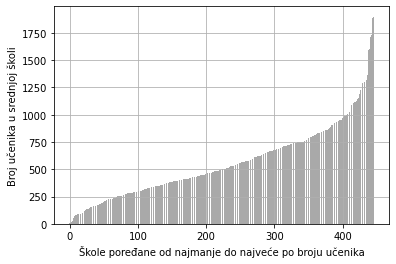

In [8]:
plt.bar(range(len(srednjeskole)),srednjeskole['Broj učenika'],color='darkgrey')
plt.xlabel('Škole poređane od najmanje do najveće po broju učenika')
plt.ylabel('Broj učenika u srednjoj školi')
plt.grid()
plt.show()

Функцији *bar* је поред висина стубића (које смо проследили кроз колону Број ученика као други аргумент), потребно је проследити и позиције на х оси. У овом случају, проследили смо редне бројеве у дужини колоне уз помоћ функције **range** и тиме на х оси добили бројеве од 0 до дужине колоне умањене за 1 (што смо добили уз помоћ *len(srednjeskole)*). Поред имена х и у осе ([**xlabel**](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.xlabel.html) и [**ylabel**](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.ylabel.html)), дијаграму смо додали и хоризонталне и вертикалне линије зарад боље читљивости (функцијом [**grid**](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.grid.html)). 

На дијаграму можемо видети да око 50 школа има преко 1000 ученика, као и да средња по величини средња школа има око 500 ученика, али да то не бисмо оцењивали визуелно могу нам помоћи функције у оквиру [*numpy*](https://numpy.org/) библиотеке. Медијална вредност је вредност у низу за коју важи да има једнак број вредности које су од ње мање и веће, и осим што је визуелно можемо потражити на претходном графику, очитавањем средишњег елемента низа који је сортиран или користећи функцију [**np.median**](https://numpy.org/doc/stable/reference/generated/numpy.median.html):

In [9]:
medijalnavrednost = np.median(srednjeskole['Broj učenika'])
medijalnavrednost

497.0

Наша визуелна процена је била доста добра зато што је стубичасти дијаграм сортираних вредности изузетно погодан за процену ове вредности. Битно је не мешати управо израчунату медијалну вредност са просечном вредношћу или типичном/најчешћом вредношћу, да се све ове три вредности разликују видећемо у наставку. Просечну вредност рачунамо користећи аритметичку средину - можемо сабрати све вредности низа и поделити дужином низа или користити функцију [**np.mean**](https://numpy.org/doc/stable/reference/generated/numpy.mean.html#:~:text=mean-,numpy.,otherwise%20over%20the%20specified%20axis.):

In [10]:
sum(srednjeskole['Broj učenika'])/len(srednjeskole['Broj učenika'])

559.7668161434977

In [11]:
prosecnavrednost = np.mean(srednjeskole['Broj učenika'])
prosecnavrednost

559.7668161434977

Дијаграм који нам може помоћи да видимо узроке ових разлика, као и која величина школе је најпопуларнија у подацима зове се хистограм такође се налази у оквиру *matplotlib* библиотеке. Позивање ове фукције обавља фреквенцијску анализу за нас, тј. уместо да ручно поделимо величине школа у групе по величинама (нпр. од 1 до 100 ученика, од 101 до 200 ученика,...) и пребројимо колико школа има у свакој групи, функција [**hist**](https://matplotlib.org/3.2.2/api/_as_gen/matplotlib.pyplot.hist.html) ради то за нас. Уколико осим података не унесемо више аргумената при позивању функције, подаци ће бити подељени у 10 једнаких група (нпр. ако најмања школа има 1 ученика а највећа 1000, групе ће бити школе са 1 до 100, 101 до 200 ученика итд.), а опцијом *bins* можемо директно дефинисати или тачан број група које хоћемо на дијаграму (нпр. bins=40) или тачне интервале величине група (нпр. bins=[0,100,200]). 

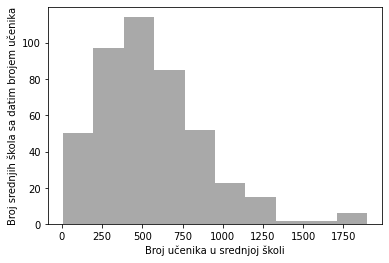

In [12]:
plt.hist(srednjeskole['Broj učenika'],color='darkgrey')
plt.xlabel('Broj učenika u srednjoj školi')
plt.ylabel('Broj srednjih škola sa datim brojem učenika')
plt.show()

На овом дијаграму нацртали смо најосновнију верзију хистограма, са 10 стубића без контроле ширине или броја стубића. Свакако, ово нам даје информацију да највише школа има око 500 ђака, али да бисмо то испитали мало детаљније, у наставку ћемо контролисати ширину стубића (аргументом *bins*) и додати вертикалне линије (функцијом [**axvline**](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.axvline.html)) да означимо просечну и медијалну вредност.

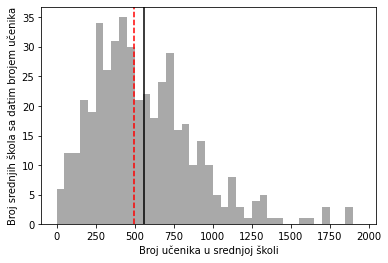

In [13]:
plt.hist(srednjeskole['Broj učenika'],bins=range(0,2000,50),color='darkgrey')
plt.xlabel('Broj učenika u srednjoj školi')
plt.ylabel('Broj srednjih škola sa datim brojem učenika')
plt.axvline(x=medijalnavrednost, color='r',linestyle='dashed')
plt.axvline(x=prosecnavrednost, color='k')
plt.show()

Са овог графика видимо да највише школа има између 400 и 450 ученика (и 200 до 250 одмах затим), док су и медијална и просечна вредност веће (обележене црвеном и црном бојом, редом), у овој и наредним радним свескама ћемо на више места видети да ове три вредности често нису исте и битно је раздвојити их. Интересантно је приметити и да постоје изузетно велике школе са скоро 2000 ученика, као и оне мале, са до 50 ученика, те податке можемо појединачно погледати селектовањем одређених делова табеле.

Команда попут ове srednjeskole['Broj učenika']<50 враћа нам низ вредности Тачно/Нетачно у зависности од тога да ли је дати елемент колоне мањи или не од броја 50:

In [14]:
srednjeskole['Broj učenika']<50

413     True
429     True
411     True
412     True
430     True
       ...  
442    False
83     False
81     False
77     False
133    False
Name: Broj učenika, Length: 446, dtype: bool

Када овакав низ тачних и нетачних вредности проследимо као аргумент табели srednjeskole добићемо оне редове табеле за коју је тврдња у заградама тачна (у овом случају, оне редове табеле који одговарају школама са мање од 50 ученика):

In [15]:
srednjeskole[srednjeskole['Broj učenika']<50]

,ID ustanove,Okrug,Opština,Naziv ustanove,Broj odeljenja,Broj kombinovanih odeljenja,Broj specijalnih odeljenja,Broj učenika,Broj devojčica,Broj nastavnika - bez zamena,Ukupna norma nastavnikaa - bez zamena,Broj zaposlenih - bez zamena,Ukupna norma zaposlenih- bez zamena
413,1778,Pećki upravni okrug,Peć,Ekonomska škola,3,0,0,5,1,12,4.2490,12,4.2490
429,1804,Kosovsko-mitrovački upravni okrug,Srbica,Tehnička škola,3,0,0,10,6,14,6.5181,25,16.6203
411,1776,Prizrenski upravni okrug,Orahovac,Gimnazija Orahovac,2,0,0,12,5,13,4.7944,20,10.7444
412,1777,Pećki upravni okrug,Peć,Gimnazija,7,0,0,17,9,31,14.7830,42,24.7830
430,1805,Kosovsko-mitrovački upravni okrug,Vučitrn,Gimnazija Vučitrn,4,0,0,29,21,25,8.2320,30,13.7320
394,1754,Kosovski upravni okrug,Priština - grad,Mašinska škola - Priština,5,0,0,31,3,26,10.8681,39,21.3681


***Задатак:*** Издвојите на сличан начин школе са више од 1700 ученика:

In [16]:
# место за ваш код

Као што сте можда и претпоставили школе са великим бројем ученика налазе се у великим градовима и имају велики број одељења и на такве "скривене" узроке је битно обраћати пажњу при обради података. На пример, у потрази за потенцијалним зависностима које постоје међу подацима сачуваним у различитим колонама, често ћемо цртати и тачкасте дијаграме [**scatter**](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.scatter.html), као што је и овај:

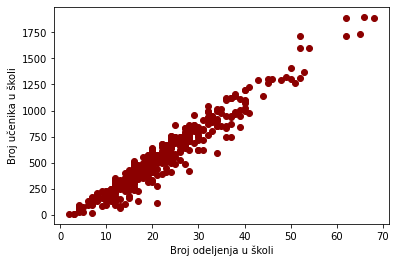

In [17]:
plt.scatter(srednjeskole['Broj odeljenja'],srednjeskole['Broj učenika'],color='darkred')
plt.xlabel('Broj odeljenja u školi')
plt.ylabel('Broj učenika u školi')
plt.show()

Функцијом **scatter** на дијаграму тачкицама представљамо средње школе из табеле srednjeskole. За сваку школу знамо укупан број одељења као и ученика и те информације користимо као х и у координате за представљање школа на овом дијаграму.

Међутим, ретко ће нам се дешавати да испитиване две величине овако изразито зависе једна од друге као што можемо видети на овом графику (где видимо да школе са великим бројем ученика имају и велики број одељења). Разлог у овоме је што ми заправо и не очекујемо да ове две величине представљене на x и y оси буду независне - тежећи да одрже број ученика у одељењима на разумном нивоу тако да настава може да се одржи, популарне и велике школе имају више одељења. Ако смо у потрази за неким мање очигледним зависностима, можемо проверити да ли постоји зависност између броја ученика по одељењу и броја одељења.

Прилично згодна карактеристика *pandas* библиотеке је што овакве операције, на пример рачунања просечног броја ученика у једном одељењу, можемо брзо и једноставно урадити за целу колону. Креираћемо нову колону 'Prosečan broj učenika u odeljenju' у коју ћемо сместити 0 за почетак:

In [18]:
srednjeskole['Prosečan broj učenika u odeljenju'] = 0

Колони можемо доделити и листу вредности, тако да на пример, можемо редом проћи кроз редове колона 'Broj učenika' и 'Broj odeljenja' и израчунати однос ова два броја, тј. просечан број ученика по одељењу:

In [19]:
radna_lista = []
for i in range(len(srednjeskole['Broj učenika'])):
    radna_lista.append(srednjeskole['Broj učenika'].iloc[i]/srednjeskole['Broj odeljenja'].iloc[i])

Вредности прикупљене у овој радној листи, сада просто можемо проследити колони у оквиру табеле и провером првих пар редова можемо проверити да ли се бројеви слажу:

In [20]:
srednjeskole['Prosečan broj učenika u odeljenju'] = radna_lista
srednjeskole.head(2)

,ID ustanove,Okrug,Opština,Naziv ustanove,Broj odeljenja,Broj kombinovanih odeljenja,Broj specijalnih odeljenja,Broj učenika,Broj devojčica,Broj nastavnika - bez zamena,Ukupna norma nastavnikaa - bez zamena,Broj zaposlenih - bez zamena,Ukupna norma zaposlenih- bez zamena,Prosečan broj učenika u odeljenju
413,1778,Pećki upravni okrug,Peć,Ekonomska škola,3,0,0,5,1,12,4.2490,12,4.2490,1.666667
429,1804,Kosovsko-mitrovački upravni okrug,Srbica,Tehnička škola,3,0,0,10,6,14,6.5181,25,16.6203,3.333333


Иако увек можемо да прођемо кроз колоне и извршимо израчунавања кроз петљу као што је приказано раније, доста бржи и једноставнији начин је да проследимо новој колони количник две колоне:

In [21]:
srednjeskole['Prosečan broj učenika u odeljenju'] = srednjeskole['Broj učenika']/srednjeskole['Broj odeljenja']

Када имате две пајтон листе, ово неће радити (пробајте!), док у оквиру пандас библиотеке, количник две колоне значи да се израчунава редом количник свака два елемента и то се извршава брже него претходно испробана петља. Ово баратање колонама није резервисано само за дељење, већ се све аритметичке и логичке операције могу користити на нивоу колона, што ћемо у наставку често користити.

У наставку је нова верзија тачкастог дијаграма, са просечним бројем ученика по одељењу за све анализиране школе:

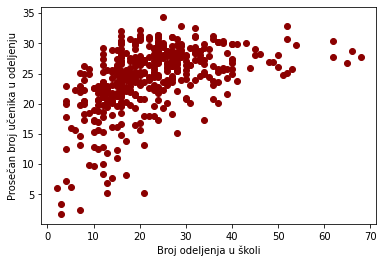

In [22]:
plt.scatter(srednjeskole['Broj odeljenja'],srednjeskole['Prosečan broj učenika u odeljenju'],color='darkred')
plt.xlabel('Broj odeljenja u školi')
plt.ylabel('Prosečan broj učenika u odeljenju')
plt.show()

На овом графику, повезаност између просечног броја ученика у одељењу и броју одељења у школи није више тако јасна, но и овај дијаграм носи неке информације: 
- да постоје школе у којима има 5-6 одељења са по 5-6 ђака у одељењу (доњи леви део дијаграма)
- да школе које имају између 10 и 30 одељења имају изузетно велики распон величина одељења, неке имају по десетак ђака у разреду, а неке и до тридесетак
- да постоје изузетно велике школе које имају и јако пуно одељења и у њима просечно одељење има 25-30 ђака

Како смо приметили да постоји варијабилитет у просечној величини одељења по школи, и тај податак можемо представити хистограмом као и раније.

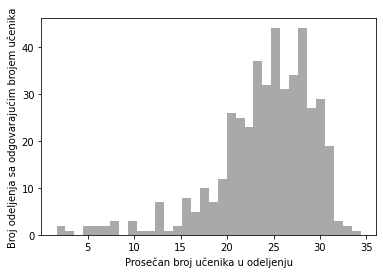

In [23]:
plt.hist(srednjeskole['Prosečan broj učenika u odeljenju'],bins=int(max(srednjeskole['Prosečan broj učenika u odeljenju'])),color='darkgrey')
plt.xlabel('Prosečan broj učenika u odeljenju')
plt.ylabel('Broj odeljenja sa odgovarajućim brojem učenika')
plt.show()

Можемо истражити и однос броја ученика и наставника и представити и то једним хистограмом:

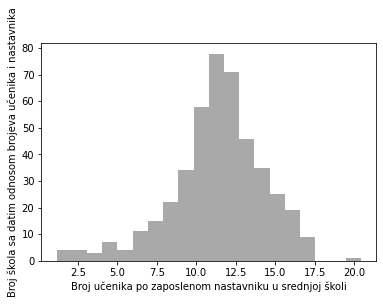

In [24]:
plt.hist(srednjeskole['Broj učenika']/srednjeskole['Ukupna norma nastavnikaa - bez zamena'],20,color='darkgrey')
plt.xlabel('Broj učenika po zaposlenom nastavniku u srednjoj školi')
plt.ylabel('Broj škola sa datim odnosom brojeva učenika i nastavnika')
plt.show()

## Разноврсност средњошколског образовања

У претходним редовима бавили смо се само бројем ученика у школама и одељењима, без залажења у детаље који образовни профили су у питању, то можемо истражити додатно у наставку користећи опцију груписања података по одређеним критеријума. За почетак истражићемо која су све подручја рада средњих школа. То можемо испитати функцијом **unique** која нам за дату колону издваја различите вредности у њој:

In [25]:
srednjoskolci['Područje rada'].unique()

array(['Poljoprivreda, proizvodnja i prerada hrane', 'Elektrotehnika',
       'Geodezija i građevinarstvo', 'Ostala delatnost ličnih usluga',
       'Mašinstvo i obrada metala', 'Gimnazija',
       'Trgovina, ugostiteljstvo i turizam',
       'Ekonomija, pravo i administracija',
       'Zdravstvo i socijalna zaštita', 'Šumarstvo i obrada drveta',
       'Hemija, nemetali i grafičarstvo', 'Tekstilstvo i kožarstvo',
       'Saobraćaj', 'Geologija, rudarstvo i metalurgija',
       'Kultura, umetnost i javno informisanje', 'Hidrometeorologija'],
      dtype=object)

Видимо да су школе организоване у више различитих подручја рада, од гимназија, преко 'здравства и социјалне заштите' до 'геологије, рударства и металургије', а сада можемо проверити и колико има ученика који се школује у сваком од ових подручја. То радимо груписањем по подручју рада ([**groupby**](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html)) и сабрањем (**sum**) укупног броја ученика у оквиру сваке од група:

In [26]:
ss_podrucja = srednjoskolci.groupby(srednjoskolci['Područje rada'])
ss_podrucja['Ukupno učenika'].sum().sort_values()

Područje rada
Hidrometeorologija                              210
Geologija, rudarstvo i metalurgija             1081
Kultura, umetnost i javno informisanje         1646
Šumarstvo i obrada drveta                      2595
Ostala delatnost ličnih usluga                 3240
Tekstilstvo i kožarstvo                        3241
Geodezija i građevinarstvo                     6365
Hemija, nemetali i grafičarstvo                8977
Saobraćaj                                     12939
Poljoprivreda, proizvodnja i prerada hrane    14364
Trgovina, ugostiteljstvo i turizam            19922
Mašinstvo i obrada metala                     22965
Zdravstvo i socijalna zaštita                 23666
Elektrotehnika                                28269
Ekonomija, pravo i administracija             32583
Gimnazija                                     66250
Name: Ukupno učenika, dtype: int64

Да не бисмо ове податке само посматрали у оквиру табеле, можемо их представити и стубичастим дијаграмом, али, овај пут ћемо испробати хоризонталну верзију (**barh**) да бисмо лакше читали називе различитих подручја рада која ће бити исписана поред сваког стубића.

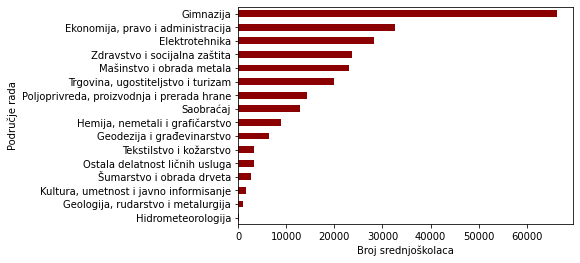

In [27]:
ss_podrucja['Ukupno učenika'].sum().sort_values().plot(kind='barh',color='darkred')
plt.xlabel('Broj srednjoškolaca'); # ознака х осе

Видимо да је највише средњошколаца у гимназијама, а прва област потом обједињује економију, право и администрацију.
Иако смо и овај график могли нацртати уз помоћ **plt.barh()** функције, зарад разноврсности различитих доступних опција, нацртали смо га користећи функцију **plоt** у оквиру *pandas* библиотеке, којој је потребно проследити и аргумент *kind* којим дефинишемо врсту графикона који желимо (подразумевана вредност је линијски дијаграм - испробајте без *kind* аргумента - који није најбољи избор за податке на располагању). Предност цртања стубичастог дијаграма на овај начин је и аутоматско означавање у осе и различитих стубића.

Можемо истражити и популарност појединачних смерова у оквиру сваке од ових области. То радимо тако што прво одаберемо специфичну област, на пример најпопуларнију економију на следећи начин: 

```py
srednjoskolci[srednjoskolci['Područje rada']=='Ekonomija, pravo i administracija']
```

што селектује само оне редове у нашој табели у којима је подручје рада баш ово изабрано. Након тога понављамо процедуру груписања, овај пут по образовним профилима и поново сумирамо све ученике на одговарајућем профилу:

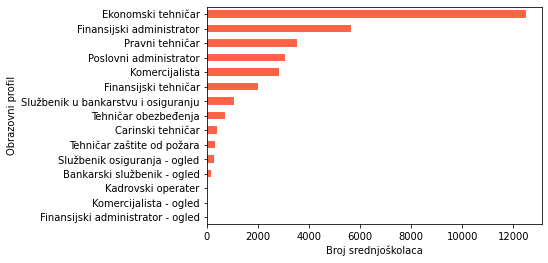

In [28]:
ekonomisti = srednjoskolci[srednjoskolci['Područje rada']=='Ekonomija, pravo i administracija']
ekonomisti_po_profilima = ekonomisti.groupby('Obrazovni profil')
ekonomisti_po_profilima['Ukupno učenika'].sum().sort_values().plot(kind='barh',color='tomato')
plt.xlabel('Broj srednjoškolaca'); # ознака х осе

Видимо да се у оквиру овог подручја рада највише ученика школује да постане Економски техничар, као и да постоје четири огледна профила чија је популарност далеко мања.

Слично, можемо истражити и трајање образовања:

In [29]:
srednjoskolci.groupby(srednjoskolci['Trajanje obrazovanja'])['Ukupno učenika'].sum()

Trajanje obrazovanja
1       131
2        45
3     32860
4    215277
Name: Ukupno učenika, dtype: int64

# Пол

Како су нам на располагању и подаци о броју ученика на различитим смеровима раздвојени и по полу, можемо видети да ли постоји разлика у популарности средњих школа међу дечацима и девојчицама. 
Поновићемо груписање по подручјима рада, само што ћемо сада сумирати поред укупног броја ученика и укупне бројеве дечака и девојчица. Резулате груписања ћемо сачувати као додатну табелу *podrucjapopolu*.

In [30]:
podrucjapopolu = pd.DataFrame(srednjoskolci.groupby(srednjoskolci['Područje rada'])[['Ukupno učenika','Ukupno decaka','Ukupno devojcica']].sum())
podrucjapopolu.head(2)

,Ukupno učenika,Ukupno decaka,Ukupno devojcica
Područje rada,,,
"Ekonomija, pravo i administracija",32583,11106,21477
Elektrotehnika,28269,25776,2493


Можемо срачунати проценат дечака и девојчица (како не бисмо чували бројеве на превеликом броју децимала, користићемо функцију **round** да заокружимо процентуалну вредност на само 2 цифре иза зареза: 

In [31]:
podrucjapopolu['Procenat decaka'] = round(100*podrucjapopolu['Ukupno decaka']/podrucjapopolu['Ukupno učenika'],2)
podrucjapopolu['Procenat devojcica'] = round(100*podrucjapopolu['Ukupno devojcica']/podrucjapopolu['Ukupno učenika'],2)

In [32]:
podrucjapopolu.head(2)

,Ukupno učenika,Ukupno decaka,Ukupno devojcica,Procenat decaka,Procenat devojcica
Područje rada,,,,,
"Ekonomija, pravo i administracija",32583,11106,21477,34.09,65.91
Elektrotehnika,28269,25776,2493,91.18,8.82


Сортирајмо податке по популарности међу једним од полова и можемо их графички представити опет уз помоћ стубичастих дијаграма, овај пут користећи и опцију *stacked* тако да су све вредности за различита подручја рада представљене на истом стубићу само различитим бојама.

In [33]:
podrucjapopolu = podrucjapopolu.sort_values(by='Procenat devojcica')

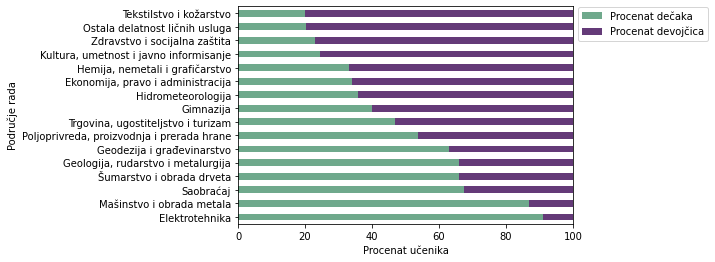

In [34]:
podrucjapopolu[['Procenat decaka','Procenat devojcica']].plot(kind='barh',stacked=True,color=('#6fa98c','#643a78'))
plt.xlim(0, 100)
plt.xlabel('Procenat učenika')
plt.legend(('Procenat dečaka','Procenat devojčica'), loc='center left', bbox_to_anchor=(1, 0.92))
plt.show()

Овде смо искористили пар додатних опција у односу на претходне графиконе (коментаришући појединачно сваку од линија можете истражити колико се добијени график разликује) - дефинисали смо специфичне боје користећи хексадекадне кодове (color=('#6fa98c','#643a78')), распон х осе (од 0 до 100%), као и позицију и садржај легенде.

Иако нам информације о заступљености полова у процентима говоре о односу дечака и девојчица у одређеним областима средњошколског образовања, изгубили смо из вида укупне бројеве заинтересованих по областима. Други начин да представимо ове податке је тако што упоредно цртамо стубиће за различите полове и приказујемо укупне бројеве ученика а не проценте:

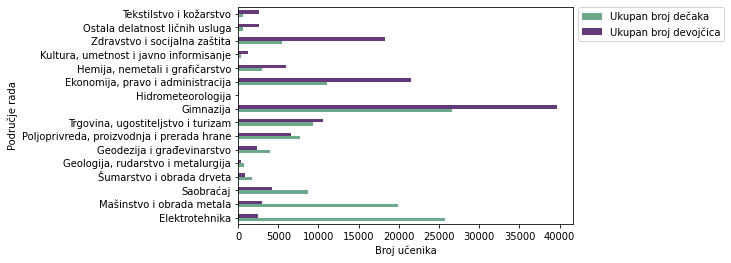

In [35]:
podrucjapopolu[['Ukupno decaka','Ukupno devojcica']].plot(kind='barh',color=('#6fa98c','#643a78'))
plt.legend(('Ukupan broj dečaka','Ukupan broj devojčica'), loc='center left', bbox_to_anchor=(1, 0.92))
plt.xlabel('Broj učenika')
plt.show()

Често је практично да два графика сагледамо упоредо, за шта је практична функција [**subplots**](https://matplotlib.org/3.3.0/api/_as_gen/matplotlib.pyplot.subplot.html). Први аргументи ове функције су димензије "табеле" у коју ће графици бити постављени, оно што би нам тренутно било згодно је да имамо 2 графика постављена један до другог, дакле 1 ред, 2 колоне графика. Додатно, можемо дефинисати и величину слике. 

Резултат **subplots** функције смештамо у **axs** што је низ оса, односно локација на које ћемо нацртати жељене подграфике. Цртање на овим подграфицима решавамо прослеђивањем ових локација функцији *plot*, као што је приказано у наставку:

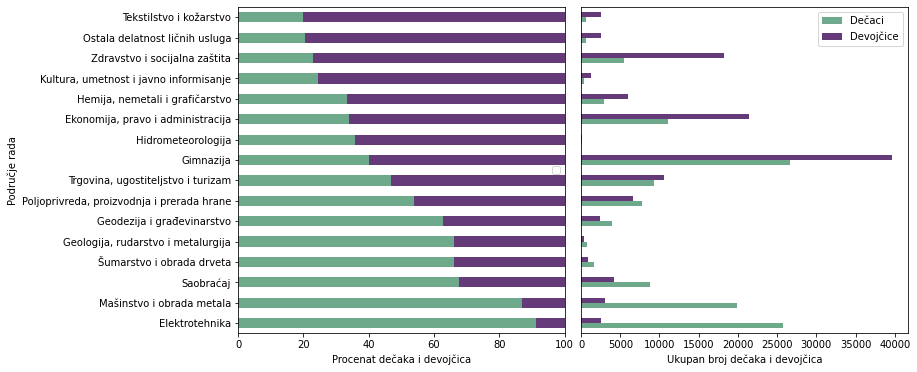

In [36]:
fig, axs = plt.subplots(1,2, figsize=(12, 6))

podrucjapopolu[['Procenat decaka','Procenat devojcica']].plot(ax=axs[0], kind='barh',stacked=True,color=('#6fa98c','#643a78'))
axs[0].set_xlim(0, 100)
axs[0].set_xlabel('Procenat dečaka i devojčica')
axs[0].legend('')

podrucjapopolu[['Ukupno decaka','Ukupno devojcica']].plot(ax=axs[1],kind='barh',color=('#6fa98c','#643a78'))
axs[1].set_yticks([]) # Нису нам потребни називи стубића на десном дијаграму обзиром да су исти као и на левом.
axs[1].set_ylabel('') # Слично можемо извацити назив у осе.
axs[1].set_xlabel('Ukupan broj dečaka i devojčica')
axs[1].legend(['Dečaci','Devojčice'])

plt.subplots_adjust(wspace=0.05)

Посматрајући ове графике заједно видимо да некада разлика од пар десетина процената може бити разлика од пар стотина ученика (нпр. култура, уметрност и јавно информисање), док некад разлика од пар процената може бити разлика од десет и више хиљада ученика (нпр. гимназије).

Да се убедимо да постоје средњошколци заинтересовани за Хидрометеорологију (обзиром да су невидљиви на десном графику), издвојићемо само ту област из табеле користећи `.loc`:

In [37]:
podrucjapopolu.loc['Hidrometeorologija']

Ukupno učenika        210.00
Ukupno decaka          75.00
Ukupno devojcica      135.00
Procenat decaka        35.71
Procenat devojcica     64.29
Name: Hidrometeorologija, dtype: float64

## Задаци

1. Користећи хистограме истражити расподелу броја наставника запослених у средњим школама у Србији. Испробајте различите опције - од броја или граница интервала, до боја правоугаоника и њихових ивица. Додајте на овај график и вертикалне линије које означавају просечну и медијалну вредност.

2. Слично као што смо груписањем и сумирањем истражили број ученика по областима образовања и дужини трајања образовања, истражити разноврсност наставе на различитим језицима. 

    (а) Групишите податке по језику наставе и креирајте табелу у којој за сваки језик имате број одељења и укупан број ученика који се школују на том језику.

    (б) Резултате представити хоризонталним стубичастим дијаграмима (где је дужина стубића број одељења или број ученика).

    (в) За неки од заступљенијих језика по избору (нпр. мађарски), истражити популарност (укупан број ученика) различитих подручја рада. Да ли се ранг листа по популарности различитих образовних профила на различитим језицима разликују?

3. Фокусирајући се на једну општину по избору, истражите величину школа, број различитих одељења као и број различитих образовних профила.
(Различите општине можете истражити уз помоћ: ```srednjoskolci['Opština'].unique()```)